In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [50]:
df=pd.read_csv("heart.csv")

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [6]:
df.shape

(918, 12)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: ylabel='Age'>

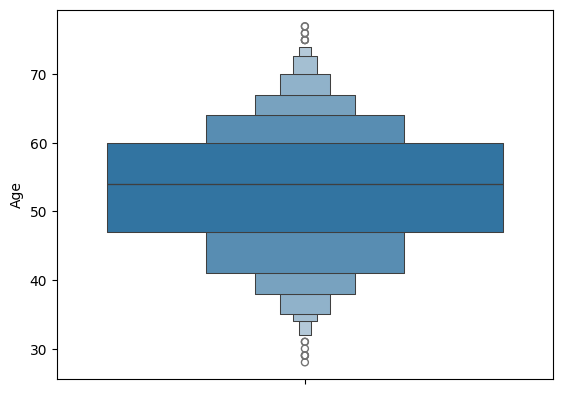

In [8]:
sns.boxenplot(df["Age"])

<Axes: xlabel='Age', ylabel='Count'>

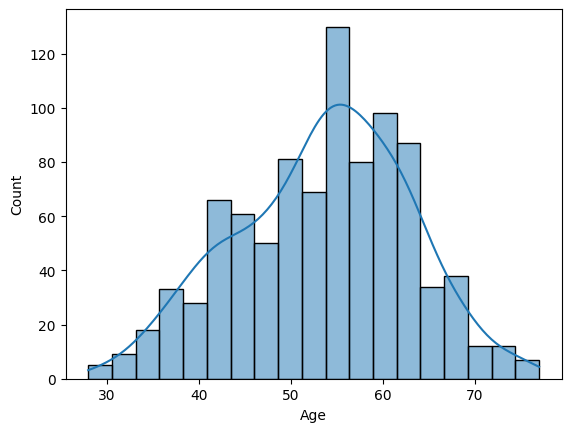

In [9]:
sns.histplot(df['Age'],kde=True)

In [10]:
import numpy as np

In [11]:
q1=np.percentile(df['Age'],[25])

In [12]:
q3=np.percentile(df['Age'],[75])

In [13]:
iqr=q3-q1

In [14]:
lower_fence=q1-(1.5*iqr)
higher_fence=q3+(1.5*iqr)

In [15]:
lower_fence

array([27.5])

In [16]:
higher_fence

array([79.5])

In [17]:
RestingBP=df['RestingBP'].values

In [18]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [73]:
RestingBP=df['RestingBP'].values
outliers=[]
def detectoutliers(age):
   threshold=3
   mean=np.mean(age)
   std=np.std(age)
   for i in age:
      z_score=(i-mean)/std
      if np.abs(z_score)>threshold:
        outliers.append(i)
   return outliers
detectoutliers(RestingBP)    

[]

In [63]:
outliers=[]
def detectoutliers(age):
   threshold=3
   mean=np.mean(age)
   std=np.std(age)
   for i in age:
      z_score=(i-mean)/std
      if np.abs(z_score)>threshold:
         outliers.append(i)
   return outliers
Cholesterol=df['Cholesterol'].values
detectoutliers(Cholesterol)   

[]

In [23]:
outliers=[]
def detectoutliers(age):
   threshold=3
   mean=np.mean(age)
   std=np.std(age)
   for i in age:
      z_score=(i-mean)/std
      if np.abs(z_score)>threshold:
         outliers.append(i)
   return outliers
FastingBS=df['FastingBS'].values
detectoutliers(FastingBS) 

[]

In [76]:
outliers=[]
def detectoutliers(age):
   threshold=3
   mean=np.mean(age)
   std=np.std(age)
   for i in age:
      z_score=(i-mean)/std
      if np.abs(z_score)>threshold:
         outliers.append(i)
   return outliers
MaxHR=df['MaxHR'].values
detectoutliers(MaxHR) 

[]

In [79]:
outliers=[]
def detectoutliers(age):
   threshold=3
   mean=np.mean(age)
   std=np.std(age)
   for i in age:
      z_score=(i-mean)/std
      if np.abs(z_score)>threshold:
         outliers.append(i)
   return outliers
Oldpeak=df['Oldpeak'].values
detectoutliers(Oldpeak) 

[]

In [77]:
df=df[(df["Oldpeak"]!=-2.6)]

In [74]:
df=df[df["MaxHR"]!=60]

In [61]:
df=df[df["Cholesterol"]<529]


In [71]:
df=df[(df["RestingBP"]!=0) & (df["RestingBP"]!=80)]

In [78]:
df.shape

(889, 12)

In [35]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [80]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
